In [0]:
#!/usr/bin/python
# coding = utf-8

import numpy as np
from keras import metrics, regularizers, backend
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import tensorflow as tf
import random as rn
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from keras import metrics, regularizers, optimizers, backend
from keras.callbacks import TensorBoard, EarlyStopping
from keras.models import Model
from keras.layers import Input, Dense, Dropout, BatchNormalization, Conv2D, Flatten, pooling
from keras.utils import np_utils, vis_utils
from keras import metrics, regularizers, optimizers, backend
from keras.callbacks import TensorBoard, EarlyStopping
from keras.models import Model
from keras.layers import Input, Dense, LSTM, CuDNNLSTM, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, vis_utils

from keras.layers import Input, Dense, LSTM, CuDNNLSTM, CuDNNGRU, SimpleRNN, Flatten, Dropout, BatchNormalization
import scipy.io as sio




In [0]:
seqLen = 100
#QPSK 四个相位
nClass = 4
samNum = 1000 * nClass
x_data_mat = sio.loadmat('train_demodulation_data_psk4.mat')

In [0]:
print(y_data_mat_int[0])
type(y_data_mat_int[0])

In [0]:
print(a)
b=y_data_mat_int[0]
b=np.array(b)
print(b)

In [0]:
np_utils.to_categorical(b,nClass)

In [0]:
x_data_complex = x_data_mat['signalData_psk4']
x_data_real = x_data_complex.real
x_data_imag = x_data_complex.imag
#x_data_real = x_data_real.reshape((1000,100))
#x_data_imag = x_data_imag.reshape((1000,100))
x_train = np.stack((x_data_real, x_data_imag), axis=2)

In [6]:
x_train.shape

(1000, 100, 2)

In [0]:
y_data_mat = sio.loadmat('train_demodulation_label_psk4.mat')
y_data_mat_int  = y_data_mat['labelData_psk4']

y_train = np_utils.to_categorical(y_data_mat_int, nClass)
#y_train = y_train.reshape(1000,100,5)

In [0]:
print(y_train)
print(x_train)

In [0]:
#分割训练集和验证集
    xTrain = x_train[0:int(x_train.shape[0]*9/10),:]
    yTrain = y_train[0:int(y_train.shape[0]*9/10),:]
    #此为验证集
    xVal = x_train[int(x_train.shape[0]*9/10):-1,:]
    yVal = y_train[int(y_train.shape[0]*9/10):-1,:]

In [12]:
 
    
    # train model
    _in_ = Input(shape = (xTrain.shape[1], xTrain.shape[2]))
    ot = Dense(1024,activation='relu')(_in_)
    #ot = Dense(256,use_bias=True, activation='relu')(ot)
    ot = Dense(500,use_bias=True, activation='relu')(ot)
    #ot = Dense(64,use_bias=True, activation='relu')(ot)
    #ot = Dense(32,use_bias=True, activation='relu')(ot)
    #ot = Dense(16,use_bias=True, activation='relu')(ot)
    #ot = Dense(8,use_bias=True, activation='relu')(ot)
    #ot = Dense(10,use_bias=True, activation='relu')(ot)
    _out_ = Dense(nClass, activation='softmax')(ot)
    model = Model(_in_, _out_)


    #early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    checkpoint = ModelCheckpoint(filepath='weights', monitor='val_loss', verbose=1, save_best_only=False)
    adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy',
                   optimizer=adam,
                   metrics=['categorical_accuracy'])


    model.fit(xTrain, yTrain, 
              epochs=100, 
              batch_size=250,
              validation_data=(xVal,yVal),
              shuffle = True,
              verbose = 2,
              callbacks = [checkpoint])
    print("evaluate the model - train_set:")
    model.summary()

Train on 900 samples, validate on 99 samples
Epoch 1/100
 - 6s - loss: 0.7631 - categorical_accuracy: 0.6579 - val_loss: 0.4504 - val_categorical_accuracy: 0.8406

Epoch 00001: saving model to weights
Epoch 2/100
 - 6s - loss: 0.5021 - categorical_accuracy: 0.8106 - val_loss: 0.4222 - val_categorical_accuracy: 0.8418

Epoch 00002: saving model to weights
Epoch 3/100
 - 6s - loss: 0.4847 - categorical_accuracy: 0.8104 - val_loss: 0.3969 - val_categorical_accuracy: 0.8431

Epoch 00003: saving model to weights
Epoch 4/100
 - 6s - loss: 0.4778 - categorical_accuracy: 0.8112 - val_loss: 0.3951 - val_categorical_accuracy: 0.8418

Epoch 00004: saving model to weights
Epoch 5/100
 - 6s - loss: 0.4684 - categorical_accuracy: 0.8107 - val_loss: 0.3991 - val_categorical_accuracy: 0.8405

Epoch 00005: saving model to weights
Epoch 6/100
 - 6s - loss: 0.4709 - categorical_accuracy: 0.8103 - val_loss: 0.3924 - val_categorical_accuracy: 0.8416

Epoch 00006: saving model to weights
Epoch 7/100
 - 6s -

In [0]:
yPredict = model.predict(xTrain)

In [70]:
print("保存QPSK解调模型 \n")
    
model.save('QPSKDemodulationModel.h5')

保存QPSK解调模型 



In [0]:
print(yPredict)
print(yTrain)

In [0]:
# test model
    LOW = -10
    HIGH = 20
    GAP = 2
    NTest = 100
    L=100
    test_data_full = sio.loadmat('test_data_demodulation_psk4.mat')
    test_data =test_data_full['test_data_demodulation_psk4']

    test_data_real = test_data.real
    test_data_imag = test_data.imag
    #x_data_real = x_data_real.reshape((1000,100))
    #x_data_imag = x_data_imag.reshape((1000,100))
    test_data_re = np.stack((test_data_real, test_data_imag), axis=2)
    yTest_full=sio.loadmat('test_label_demodulation_psk4.mat')
    yTest= yTest_full['test_label_demodulation_psk4']
    xTest = test_data_re[:,0:NTest]
    #yTest = test_data[:,NTest]
    #yTest.astype(int)
    
    yPredict = model.predict(xTest)
    predict_curve = np.zeros((2, int((HIGH-LOW)/GAP) + 1)) # snr + Pc

In [0]:
    #第一个for循环得到x轴的刻度
    for i in range(predict_curve.shape[1]): # snr - [-10 -8 ... 18 20]
        predict_curve[0, i] = LOW + GAP * i
    #不同信噪比的信号 预测正确的个数
    for i in range(test_data_re.shape[0]): 
        snr_loc = int((test_data_re[i, L,0] - LOW)/GAP);
        for j in range(L):
          if yTest[i,j] == np.argmax(yPredict[i,j]):
            continue
          else:
            break
        
        if j == L-1 :
          predict_curve[1, snr_loc] = predict_curve[1, snr_loc] + 1
    #不同信噪比预测正确的百分比，结果应该为噪声越大，预测准确率越低，信噪比越高，预测准确率越高
    for i in range(predict_curve.shape[1]): # Pc - cal pc(cnt_num/sum_num 390/100)
        predict_curve[1, i] = predict_curve[1, i]/(NTest)

In [68]:
print(np.argmax(yPredict[0,0]))
print(yPredict.shape)
print(yTest.shape)
print(test_data_re[0,100])
print(predict_curve)

1
(1600, 100, 4)
(1600, 100)
[-10.   0.]
[[-10.    -8.    -6.    -4.    -2.     0.     2.     4.     6.     8.
   10.    12.    14.    16.    18.    20.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.27
    0.92   0.99   1.     1.     1.     1.  ]]


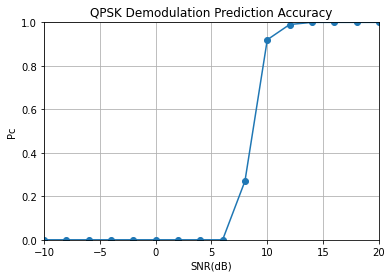

In [69]:
#输入测试集计算预测的准确性，可以看到snr 在10b之下的时候，由于噪声过大，模型解调正确率很低
#当SNR大于等于10db的时候，模型接近百分之百预测正确信号的解调
plt.plot(predict_curve[0], predict_curve[1], 'o-')

plt.grid(True)
#plt.legend(loc='lower right')
plt.xlim((LOW, HIGH))
plt.ylim((0,1))
plt.xlabel('SNR(dB)')
plt.ylabel('Pc')
plt.title('QPSK Demodulation Prediction Accuracy')
plt.savefig('QPSK_Demodulatio_accuracy.png', format='png')
#res = np.vstack((snr, acc))

In [0]:
#8PSK数据读取
seqLen = 100
#8PSK 四个相位
nClass = 8
samNum = 1000 * nClass
x_data_mat = sio.loadmat('train_demodulation_data_psk8.mat')
x_data_complex = x_data_mat['signalData_psk8']
x_data_real = x_data_complex.real
x_data_imag = x_data_complex.imag
#x_data_real = x_data_real.reshape((1000,100))
#x_data_imag = x_data_imag.reshape((1000,100))
x_train = np.stack((x_data_real, x_data_imag), axis=2)
y_data_mat = sio.loadmat('train_demodulation_label_psk8.mat')
y_data_mat_int  = y_data_mat['labelData_psk8']

y_train = np_utils.to_categorical(y_data_mat_int, nClass)
#分割训练集和验证集
xTrain = x_train[0:int(x_train.shape[0]*9/10),:]
yTrain = y_train[0:int(y_train.shape[0]*9/10),:]
#此为验证集
xVal = x_train[int(x_train.shape[0]*9/10):-1,:]
yVal = y_train[int(y_train.shape[0]*9/10):-1,:]

In [82]:
#8psk 模型训练及保存
 
    # train model
    _in_ = Input(shape = (xTrain.shape[1], xTrain.shape[2]))
    ot = Dense(1024,activation='relu')(_in_)
    #ot = Dense(256,use_bias=True, activation='relu')(ot)
    ot = Dense(500,use_bias=True, activation='relu')(ot)
    #ot = Dense(64,use_bias=True, activation='relu')(ot)
    #ot = Dense(32,use_bias=True, activation='relu')(ot)
    #ot = Dense(16,use_bias=True, activation='relu')(ot)
    #ot = Dense(8,use_bias=True, activation='relu')(ot)
    #ot = Dense(10,use_bias=True, activation='relu')(ot)
    _out_ = Dense(nClass, activation='softmax')(ot)
    model = Model(_in_, _out_)


    #early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    checkpoint = ModelCheckpoint(filepath='weights', monitor='val_loss', verbose=1, save_best_only=False)
    adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy',
                   optimizer=adam,
                   metrics=['categorical_accuracy'])


    model.fit(xTrain, yTrain, 
              epochs=20, 
              batch_size=250,
              validation_data=(xVal,yVal),
              shuffle = True,
              verbose = 2,
              callbacks = [checkpoint])
    print("evaluate the model - train_set:")
    model.summary()
    print("保存8PSK解调模型 \n")
    
    model.save('8PSKDemodulationModel.h5')

Train on 900 samples, validate on 99 samples
Epoch 1/20
 - 6s - loss: 1.4503 - categorical_accuracy: 0.4935 - val_loss: 1.2072 - val_categorical_accuracy: 0.5698

Epoch 00001: saving model to weights
Epoch 2/20
 - 6s - loss: 1.0604 - categorical_accuracy: 0.6262 - val_loss: 1.0167 - val_categorical_accuracy: 0.6174

Epoch 00002: saving model to weights
Epoch 3/20
 - 6s - loss: 0.9404 - categorical_accuracy: 0.6413 - val_loss: 0.9708 - val_categorical_accuracy: 0.6340

Epoch 00003: saving model to weights
Epoch 4/20
 - 6s - loss: 0.9305 - categorical_accuracy: 0.6496 - val_loss: 0.9449 - val_categorical_accuracy: 0.6406

Epoch 00004: saving model to weights
Epoch 5/20
 - 6s - loss: 0.8999 - categorical_accuracy: 0.6532 - val_loss: 0.9439 - val_categorical_accuracy: 0.6407

Epoch 00005: saving model to weights
Epoch 6/20
 - 6s - loss: 0.9047 - categorical_accuracy: 0.6544 - val_loss: 0.9345 - val_categorical_accuracy: 0.6389

Epoch 00006: saving model to weights
Epoch 7/20
 - 6s - loss: 

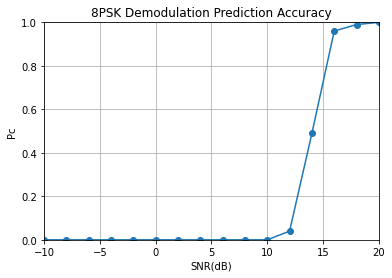

In [83]:
#8PSK 测试解调 对于不同SNR信号的解调性能
# test model
    LOW = -10
    HIGH = 20
    GAP = 2
    NTest = 100
    L=100
    test_data_full = sio.loadmat('test_data_demodulation_psk8.mat')
    test_data =test_data_full['test_data_demodulation_psk8']

    test_data_real = test_data.real
    test_data_imag = test_data.imag
    #x_data_real = x_data_real.reshape((1000,100))
    #x_data_imag = x_data_imag.reshape((1000,100))
    test_data_re = np.stack((test_data_real, test_data_imag), axis=2)
    yTest_full=sio.loadmat('test_label_demodulation_psk8.mat')
    yTest= yTest_full['test_label_demodulation_psk8']
    xTest = test_data_re[:,0:NTest]
    #yTest = test_data[:,NTest]
    #yTest.astype(int)
    
    yPredict = model.predict(xTest)
    predict_curve = np.zeros((2, int((HIGH-LOW)/GAP) + 1)) # snr + Pc

     #第一个for循环得到x轴的刻度
    for i in range(predict_curve.shape[1]): # snr - [-10 -8 ... 18 20]
        predict_curve[0, i] = LOW + GAP * i
    #不同信噪比的信号 预测正确的个数
    for i in range(test_data_re.shape[0]): 
        snr_loc = int((test_data_re[i, L,0] - LOW)/GAP);
        for j in range(L):
          if yTest[i,j] == np.argmax(yPredict[i,j]):
            continue
          else:
            break
        
        if j == L-1 :
          predict_curve[1, snr_loc] = predict_curve[1, snr_loc] + 1
    #不同信噪比预测正确的百分比，结果应该为噪声越大，预测准确率越低，信噪比越高，预测准确率越高
    for i in range(predict_curve.shape[1]): 
        predict_curve[1, i] = predict_curve[1, i]/(NTest)
    
    #输入测试集计算预测的准确性，可以看到snr 在10b之下的时候，由于噪声过大，模型解调正确率很低
    #当SNR大于等于10db的时候，模型接近百分之百预测正确信号的解调
    plt.plot(predict_curve[0], predict_curve[1], 'o-')

    plt.grid(True)
    #plt.legend(loc='lower right')
    plt.xlim((LOW, HIGH))
    plt.ylim((0,1))
    plt.xlabel('SNR(dB)')
    plt.ylabel('Pc')
    plt.title('8PSK Demodulation Prediction Accuracy')
    plt.savefig('8PSK_Demodulation_accuracy.png', format='png')
    #res = np.vstack((snr, acc))

In [0]:
#16QAM数据读取 训练数据在20-44db snr之间
nClass = 16
samNum = 1000 * nClass
x_data_mat = sio.loadmat('train_demodulation_data_qam16.mat')
x_data_complex = x_data_mat['signalData_qam16']
x_data_real = x_data_complex.real
x_data_imag = x_data_complex.imag
#x_data_real = x_data_real.reshape((1,1000,100))
#x_data_imag = x_data_imag.reshape((1,1000,100))
x_train = np.stack((x_data_real, x_data_imag),axis=2)
y_data_mat = sio.loadmat('train_demodulation_label_qam16.mat')
y_data_mat_int  = y_data_mat['labelData_qam16']
#y_data_mat_int =y_data_mat_int.reshape((1,1000,100))
y_train = np_utils.to_categorical(y_data_mat_int, nClass)
#分割训练集和验证集
xTrain = x_train[0:int(x_train.shape[0]*9/10),:]
yTrain = y_train[0:int(y_train.shape[0]*9/10),:]
#此为验证集
xVal = x_train[int(x_train.shape[0]*9/10):-1,:]
yVal = y_train[int(y_train.shape[0]*9/10):-1,:]

In [191]:
x_train.shape

(10000, 100, 2)

In [199]:
#16QAM 模型训练及保存
 # train model
    _in_ = Input(shape = (xTrain.shape[1], xTrain.shape[2]))
    #ot = LSTM(100, return_sequences=False)(_in_)
    ot = Dense(256,use_bias=True, activation='relu')(_in_)
    ot = Dense(64,use_bias=True, activation='relu')(ot)
   # ot = Dense(64,use_bias=True, activation='relu')(ot)
    #ot = Dense(32,use_bias=True, activation='relu')(ot)
    #ot = Dense(16,use_bias=True, activation='relu')(ot)
    #ot = Dense(8,use_bias=True, activation='relu')(ot)
    #ot = Dense(10,use_bias=True, activation='relu')(ot)
    _out_ = Dense(nClass, activation='softmax')(ot)
    model = Model(_in_, _out_)


    #early_stopping = EarlyStopping(monitor='val_loss', patience=10)
    checkpoint = ModelCheckpoint(filepath='weights', monitor='val_loss', verbose=1, save_best_only=False)
    adam = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
    model.compile(loss='categorical_crossentropy',
                   optimizer=adam,
                   metrics=['categorical_accuracy'])


    model.fit(xTrain, yTrain, 
              epochs=50, 
              batch_size=250,
              validation_data=(xVal,yVal),
              shuffle = True,
              verbose = 2,
              callbacks = [checkpoint])
    print("evaluate the model - train_set:")
    model.summary()
    print("保存16QAM解调模型 \n")
    
    model.save('16QAMDemodulationModel.h5')

Train on 9000 samples, validate on 999 samples
Epoch 1/50
 - 4s - loss: 1.5270 - categorical_accuracy: 0.6840 - val_loss: 0.5462 - val_categorical_accuracy: 0.8182

Epoch 00001: saving model to weights
Epoch 2/50
 - 4s - loss: 0.4159 - categorical_accuracy: 0.8213 - val_loss: 0.3326 - val_categorical_accuracy: 0.8274

Epoch 00002: saving model to weights
Epoch 3/50
 - 4s - loss: 0.3389 - categorical_accuracy: 0.8270 - val_loss: 0.3072 - val_categorical_accuracy: 0.8308

Epoch 00003: saving model to weights
Epoch 4/50
 - 4s - loss: 0.3067 - categorical_accuracy: 0.8283 - val_loss: 0.3017 - val_categorical_accuracy: 0.8337

Epoch 00004: saving model to weights
Epoch 5/50
 - 4s - loss: 0.3259 - categorical_accuracy: 0.8257 - val_loss: 0.3662 - val_categorical_accuracy: 0.8307

Epoch 00005: saving model to weights
Epoch 6/50
 - 4s - loss: 0.3118 - categorical_accuracy: 0.8269 - val_loss: 0.2949 - val_categorical_accuracy: 0.8312

Epoch 00006: saving model to weights
Epoch 7/50
 - 4s - loss

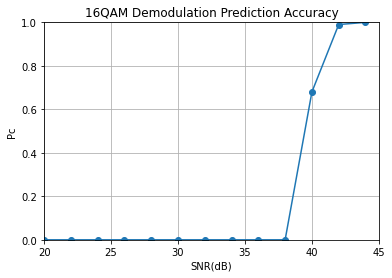

In [205]:
#16QAM 测试解调 对于不同SNR信号的解调性能

# test model
    LOW = 20
    HIGH = 45
    GAP = 2
    NTest = 100
    L=100
    test_data_full = sio.loadmat('test_data_demodulation_qam16.mat')
    test_data =test_data_full['test_data_demodulation_qam16']

    test_data_real = test_data.real
    test_data_imag = test_data.imag
    #x_data_real = x_data_real.reshape((1000,100))
    #x_data_imag = x_data_imag.reshape((1000,100))
    test_data_re = np.stack((test_data_real, test_data_imag), axis=2)
    yTest_full=sio.loadmat('test_label_demodulation_qam16.mat')
    yTest= yTest_full['test_label_demodulation_qam16']
    xTest = test_data_re[:,0:NTest]
    #yTest = test_data[:,NTest]
    #yTest.astype(int)
    
    yPredict = model.predict(xTest)
    predict_curve = np.zeros((2, int((HIGH-LOW)/GAP) + 1)) # snr + Pc

     #第一个for循环得到x轴的刻度
    for i in range(predict_curve.shape[1]): # snr - [-10 -8 ... 18 20]
        predict_curve[0, i] = LOW + GAP * i
    #不同信噪比的信号 预测正确的个数
    for i in range(test_data_re.shape[0]): # Pc - count num [ 100]
        snr_loc = int((test_data_re[i, L,0] - LOW)/GAP);
        for j in range(L):
          if yTest[i,j] == np.argmax(yPredict[i,j]):
            continue
          else:
            break
        
        if j == L-1 :
          predict_curve[1, snr_loc] = predict_curve[1, snr_loc] + 1
    #不同信噪比预测正确的百分比，结果应该为噪声越大，预测准确率越低，信噪比越高，预测准确率越高
    for i in range(predict_curve.shape[1]): # Pc - cal pc(cnt_num/sum_num 90/100)
        predict_curve[1, i] = predict_curve[1, i]/(NTest)
    
    #输入测试集计算预测的准确性，可以看到snr 在40b之下的时候，由于噪声过大，模型解调正确率很低
    #当SNR大于等于40db的时候，模型接近百分之百预测正确信号的解调
    plt.plot(predict_curve[0], predict_curve[1], 'o-')

    plt.grid(True)
    #plt.legend(loc='lower right')
    plt.xlim((LOW, HIGH))
    plt.ylim((0,1))
    plt.xlabel('SNR(dB)')
    plt.ylabel('Pc')
    plt.title('16QAM Demodulation Prediction Accuracy')
    plt.savefig('16QAM_Demodulatio_accuracy.png', format='png')
    #res = np.vstack((snr, acc))

In [119]:
print(x_train)

[[[-0.78469112  3.30504487]
  [ 2.10543131  1.64010157]
  [-0.10723487 -3.75611233]
  ...
  [ 1.97239224 -1.13529212]
  [ 0.96898336 -3.71376571]
  [ 1.7100208  -1.96093634]]

 [[-0.3281212  -0.04062746]
  [ 0.1517269  -0.66460293]
  [ 1.81116373 -0.63644686]
  ...
  [-1.06477326 -0.49528597]
  [ 0.29232022 -1.06652387]
  [ 0.85649757  0.57136247]]

 [[-2.11997348 -3.28819688]
  [-9.92095309 10.74121293]
  [ 9.4691849   9.72386486]
  ...
  [-9.72980453 -3.12768631]
  [-8.84500164 -9.1535299 ]
  [-9.22173425 -9.30095281]]

 ...

 [[-1.21625313  0.14082867]
  [-0.54479144  1.37080208]
  [-0.39279498 -0.46099419]
  ...
  [-0.68401827 -0.75497834]
  [-0.49528023  1.78914072]
  [ 1.10006836 -0.02705995]]

 [[-0.63406134 -1.57182096]
  [ 0.52914044  1.72065352]
  [ 1.79790015  0.55030569]
  ...
  [ 1.07768867  1.17814454]
  [ 1.20704467 -1.66416709]
  [-1.21635811 -0.60501412]]

 [[ 1.45460185 -0.23497657]
  [ 1.07947173 -0.6700062 ]
  [-0.92885823  0.41546535]
  ...
  [ 0.82817828 -0.470925